In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv(r"D:\Py\Colab Work\ML\K-Means Clustering\Cricket.csv",encoding='latin1')
# sometimes columns are not properly aligned. Therefore, latin1 encoding is used to make alignment proper.

In [3]:
data

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [5]:
data[["start","end"]]=data["Span"].str.split("-",expand=True)
# span is of no use however span can be used to get the experience

In [6]:
data[["start","end"]]=data[["start","end"]].astype(int) #spilt the span 

In [7]:
data["Experience"]=data["end"]-data["start"]

In [8]:
data

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,Experience
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991,16
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015,13
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011,10
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009,11


In [9]:
data.isnull().sum()

Player        0
Span          0
Mat           0
Inns          0
NO            0
Runs          0
HS            0
Ave           0
BF            0
SR            0
100           0
50            0
0             0
start         0
end           0
Experience    0
dtype: int64

In [10]:
# we can see astrick in the column "HS", have to remove it
data['HS']=data['HS'].str.extract('(\d+)')

In [11]:
data

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,Experience
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133,45.03,7908,64.92,11,31,3,1975,1991,16
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96,43.40,6945,73.75,0,42,6,2002,2015,13
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120,35.36,6614,76.98,5,26,7,2001,2011,10
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009,11


In [12]:
data.drop(columns=["Span","start","end"],inplace=True,axis=1)

In [13]:
data

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Experience
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


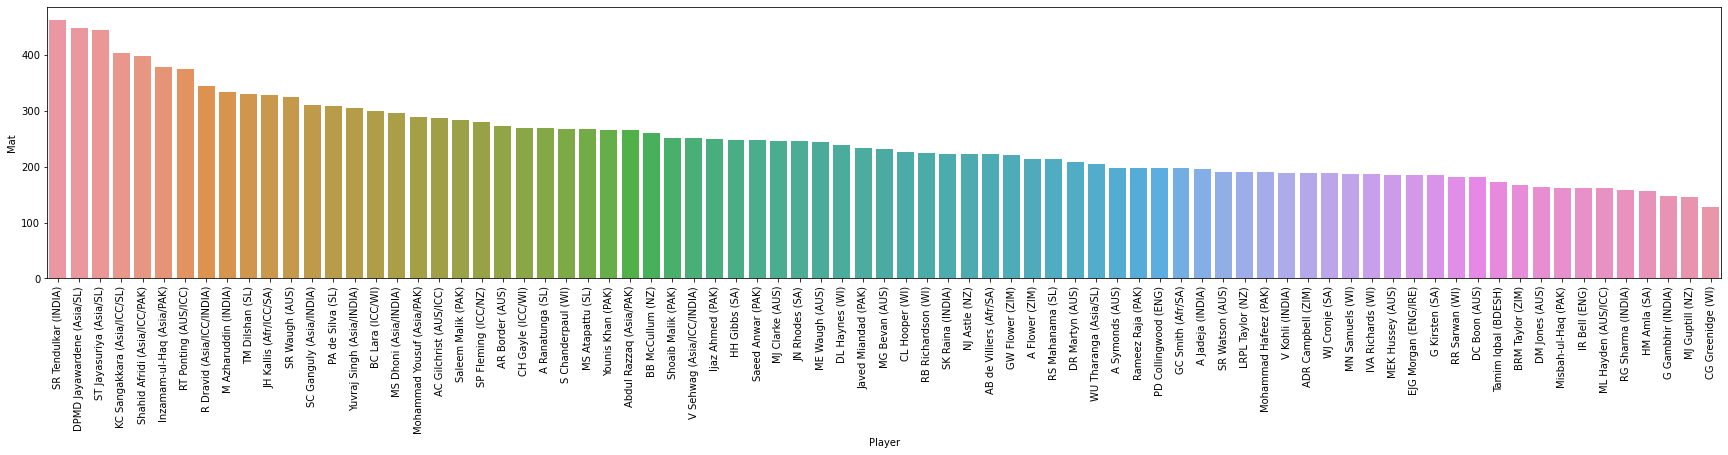

In [14]:
data["HS"]=data["HS"].astype(int)

# Visualizing the data
plt.figure(figsize=(30,5))
mat=data.sort_values(by="Mat",ascending=False)
x=mat["Player"]
y=mat["Mat"]
sns.barplot(x,y)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


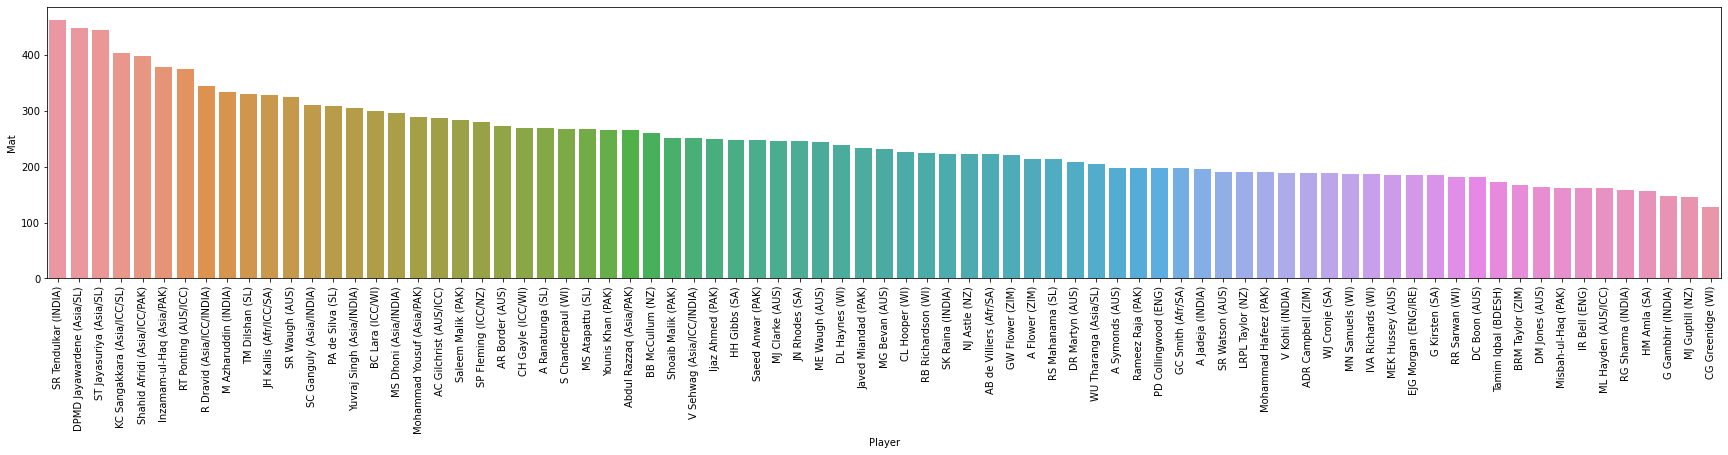

C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


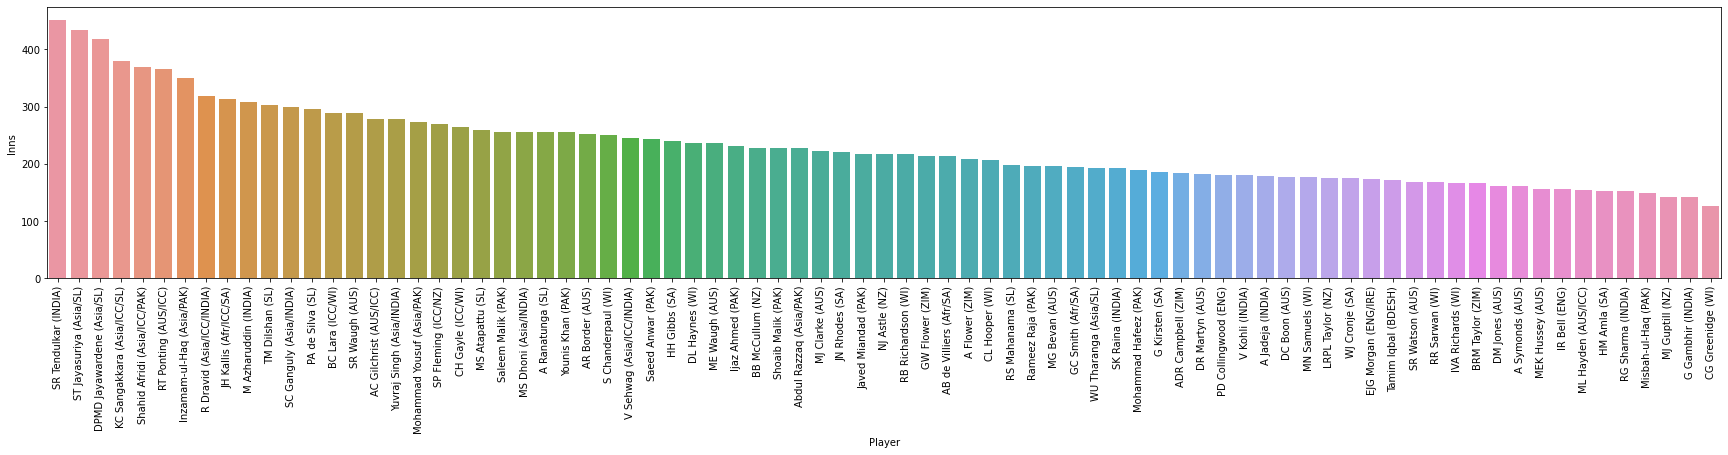

C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


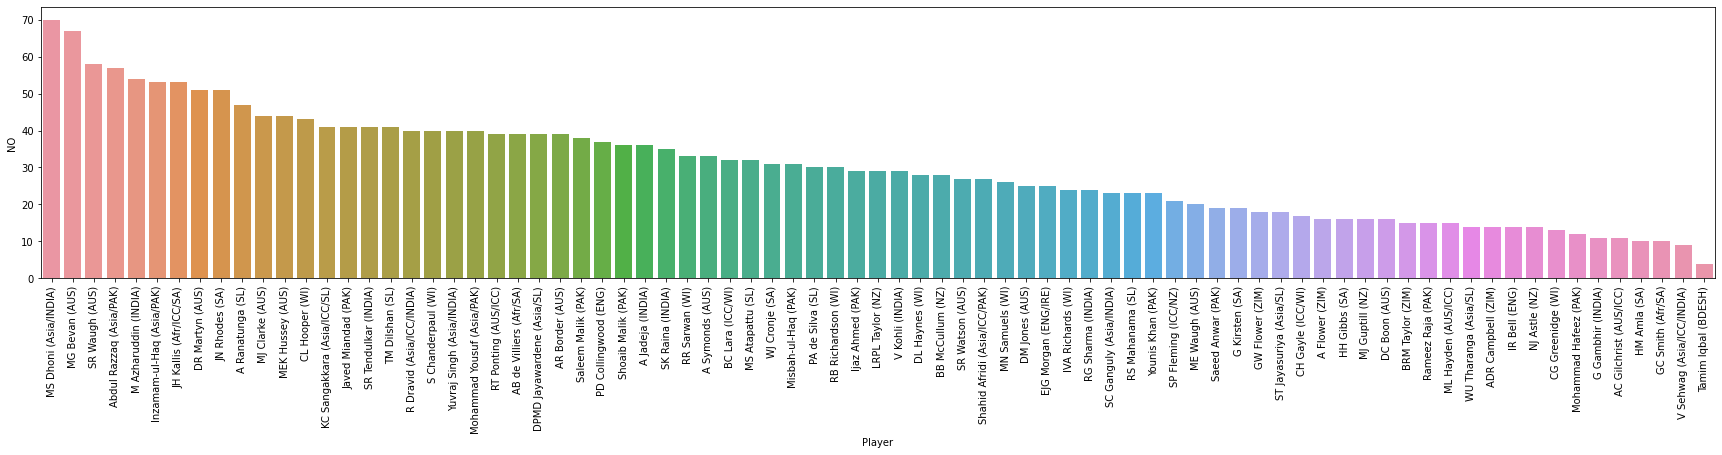

C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


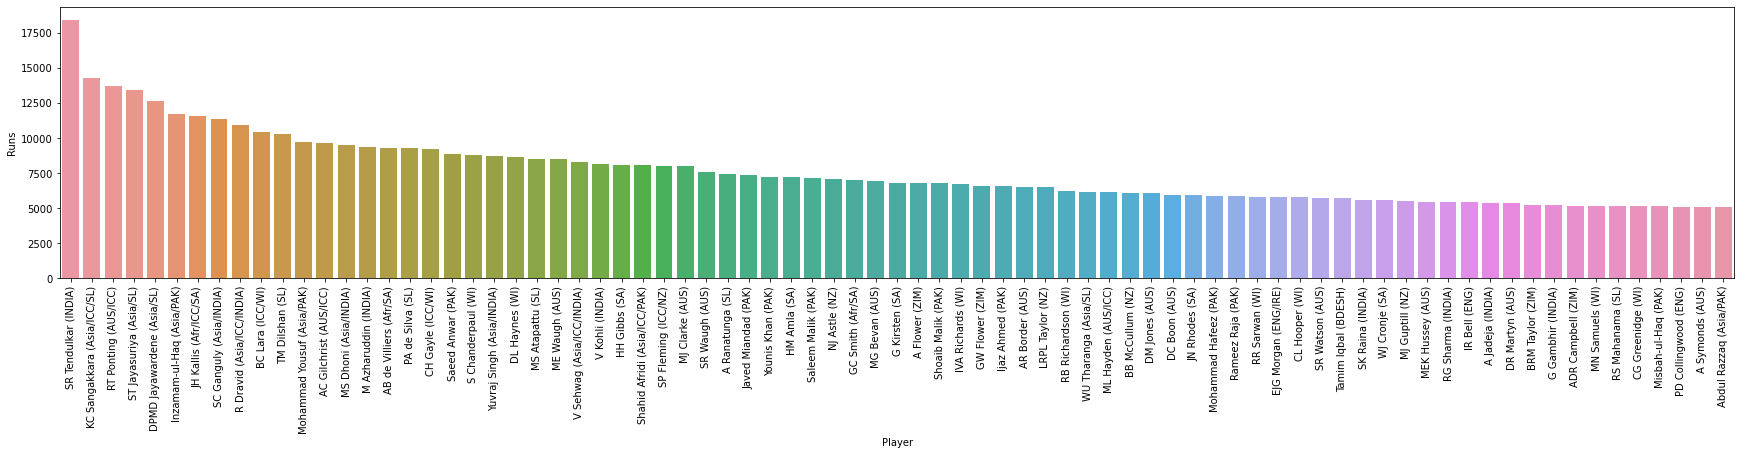

C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


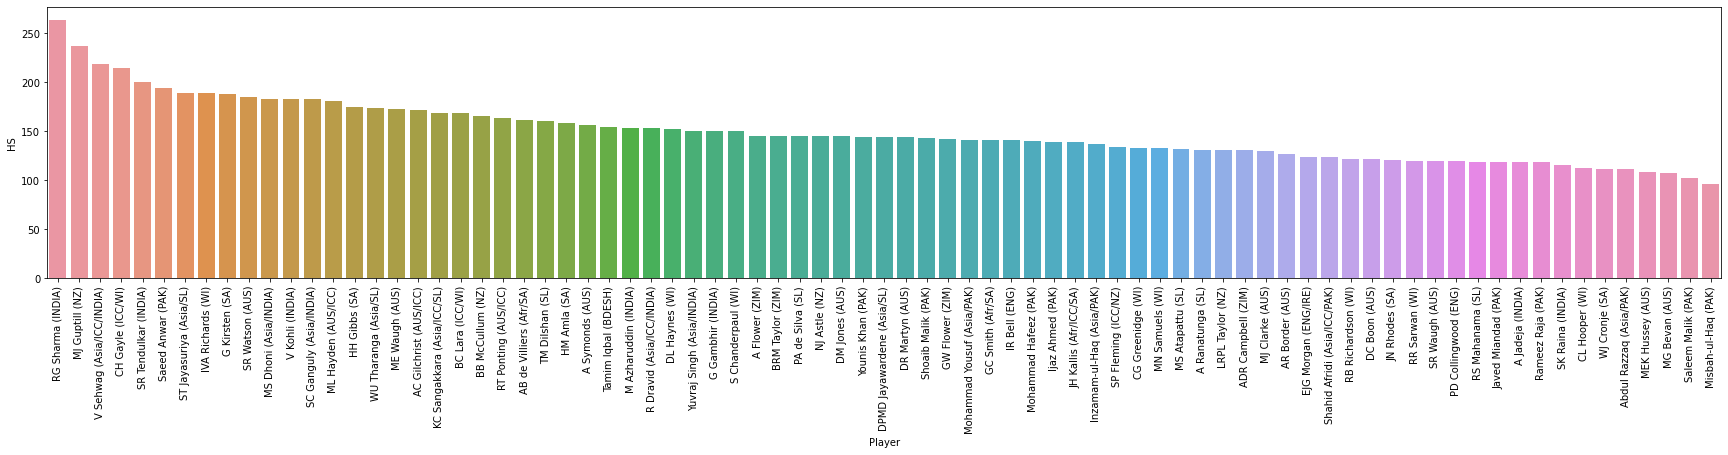

C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


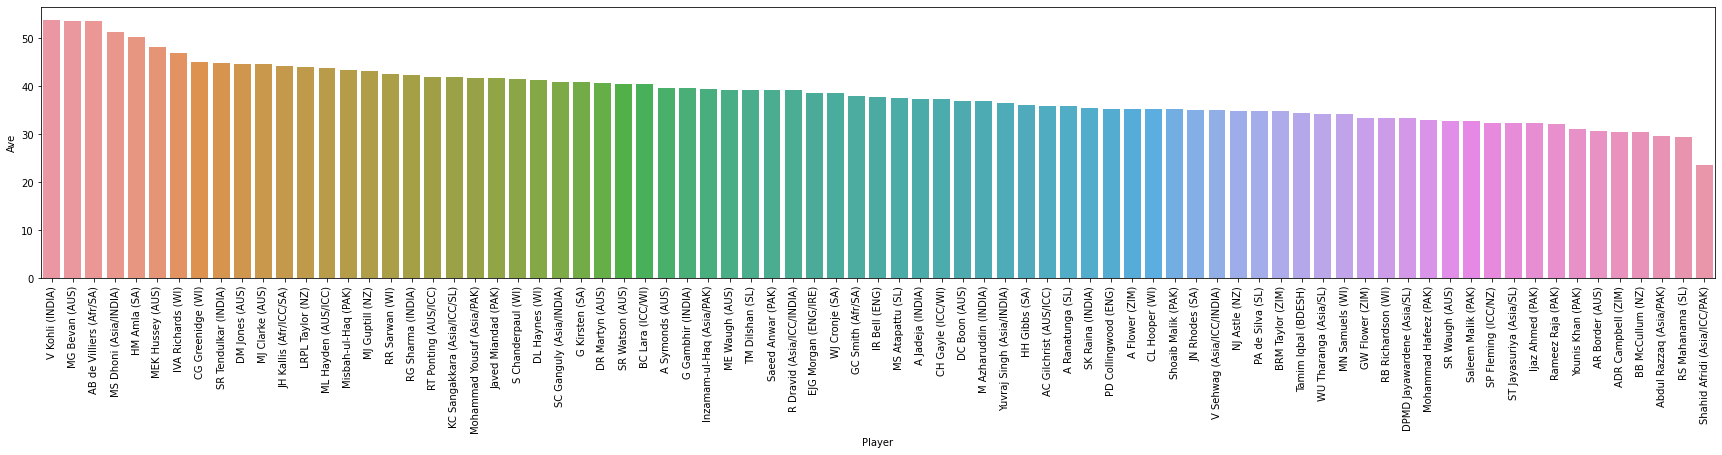

C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


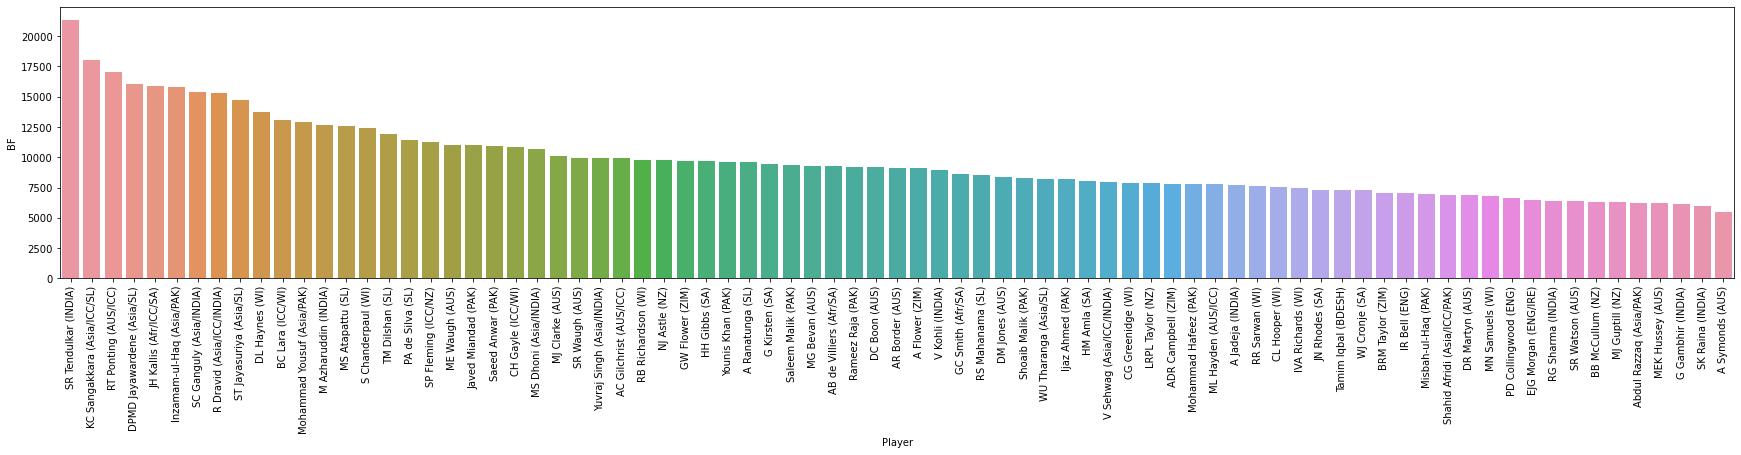

C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


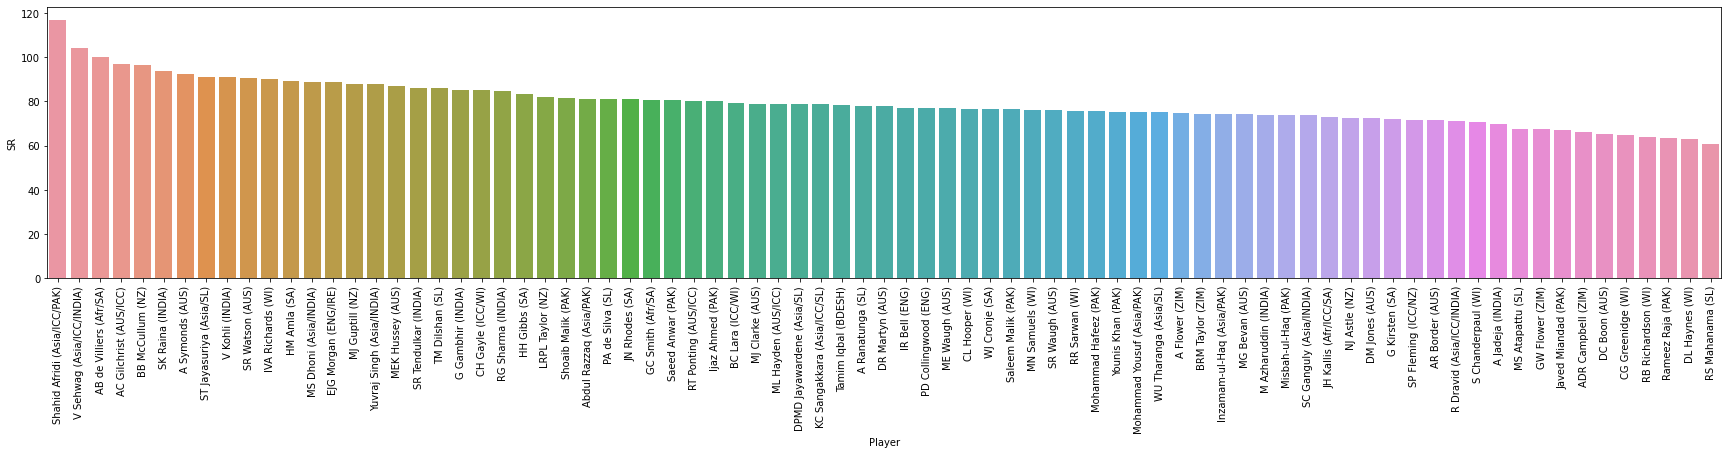

C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


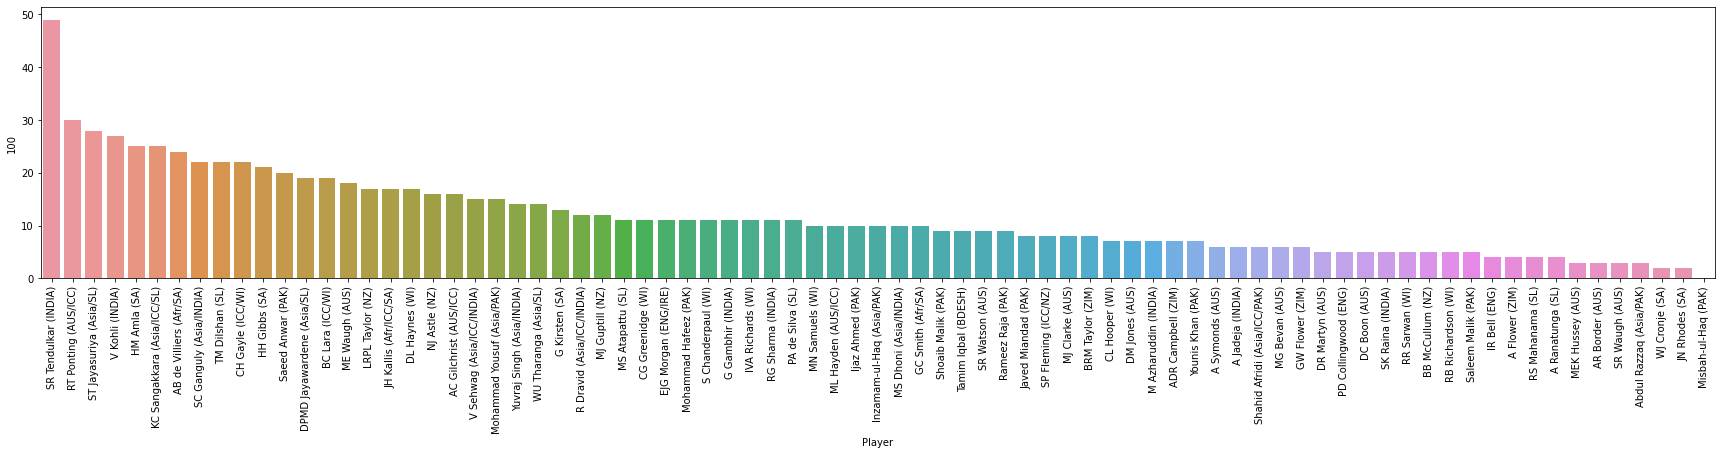

C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


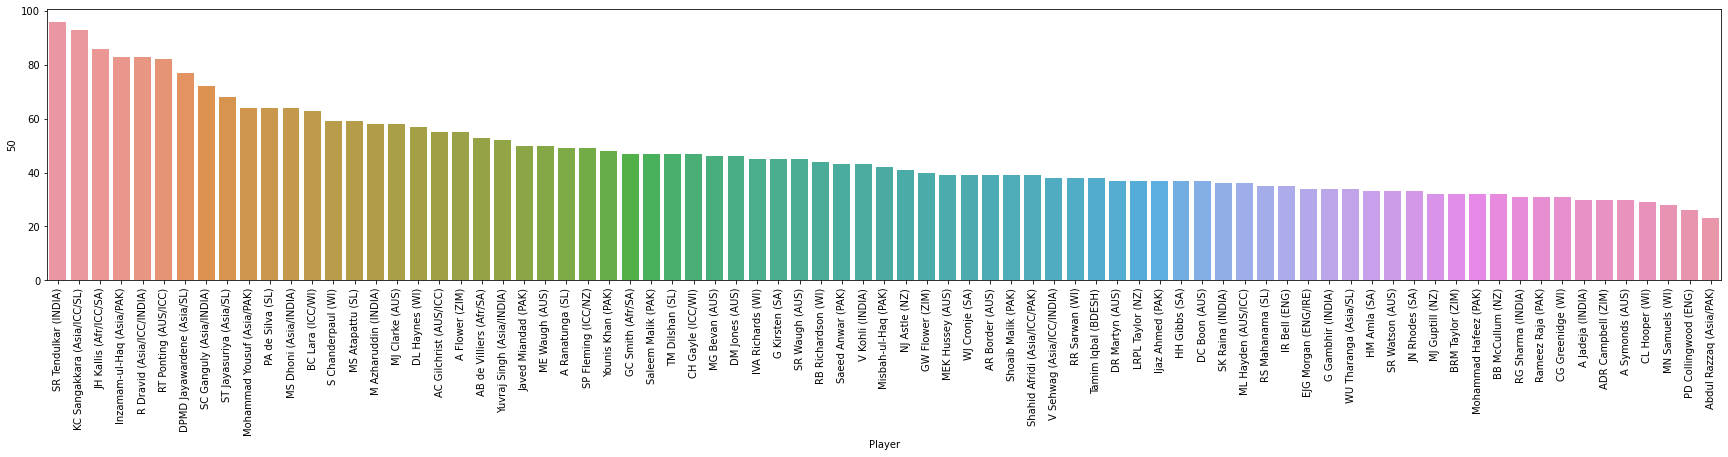

C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


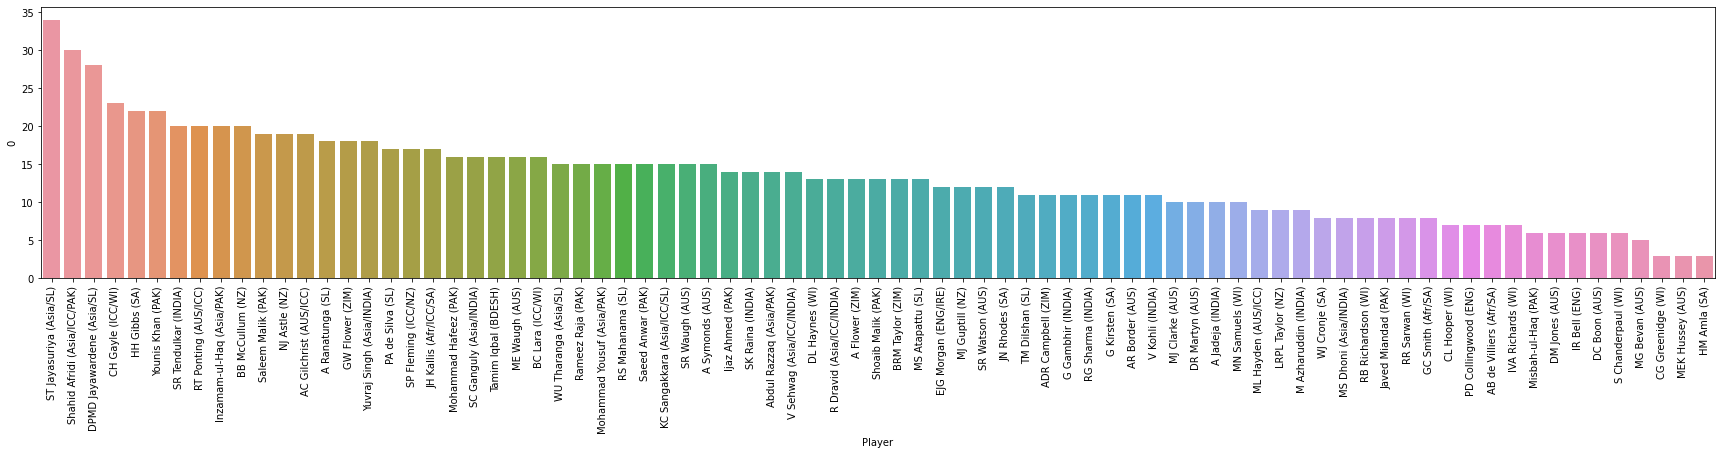

C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


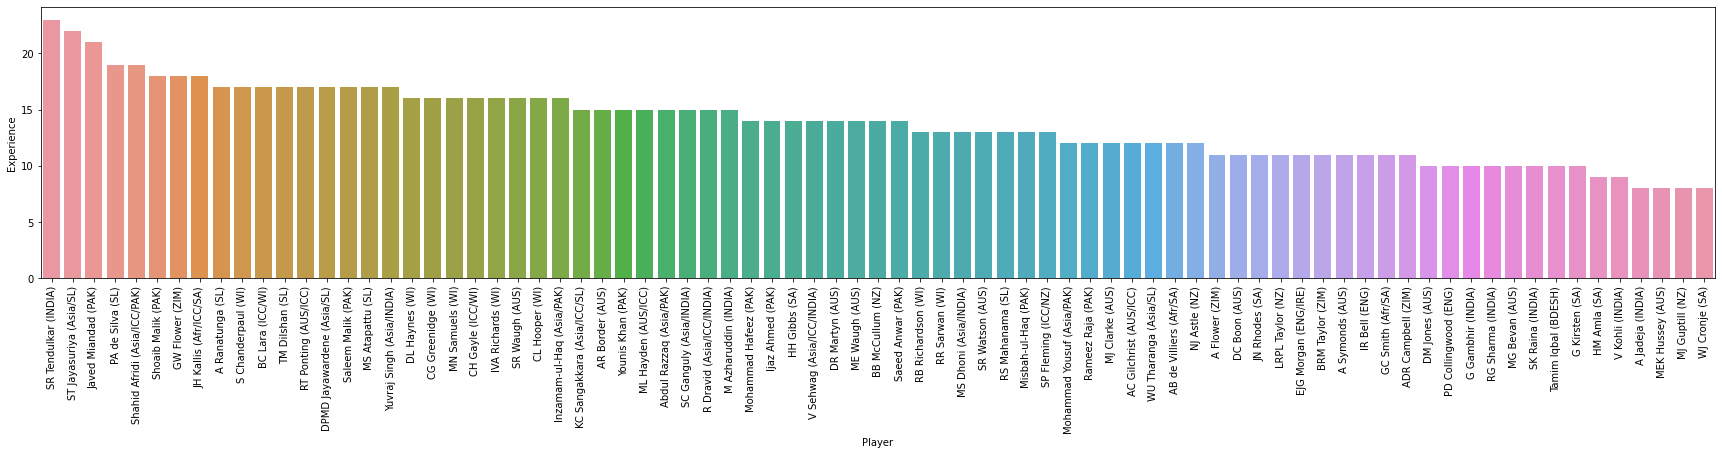

In [17]:
a=data.iloc[:,1:13]

col=list(a.columns)
for i in col:
    mat=data.sort_values(i,ascending=False)
    x=mat["Player"]
    y=mat[i]
    plt.figure(figsize=(30,5))
    sns.barplot(x,y)
    plt.xticks(rotation=90)
    plt.show()
    

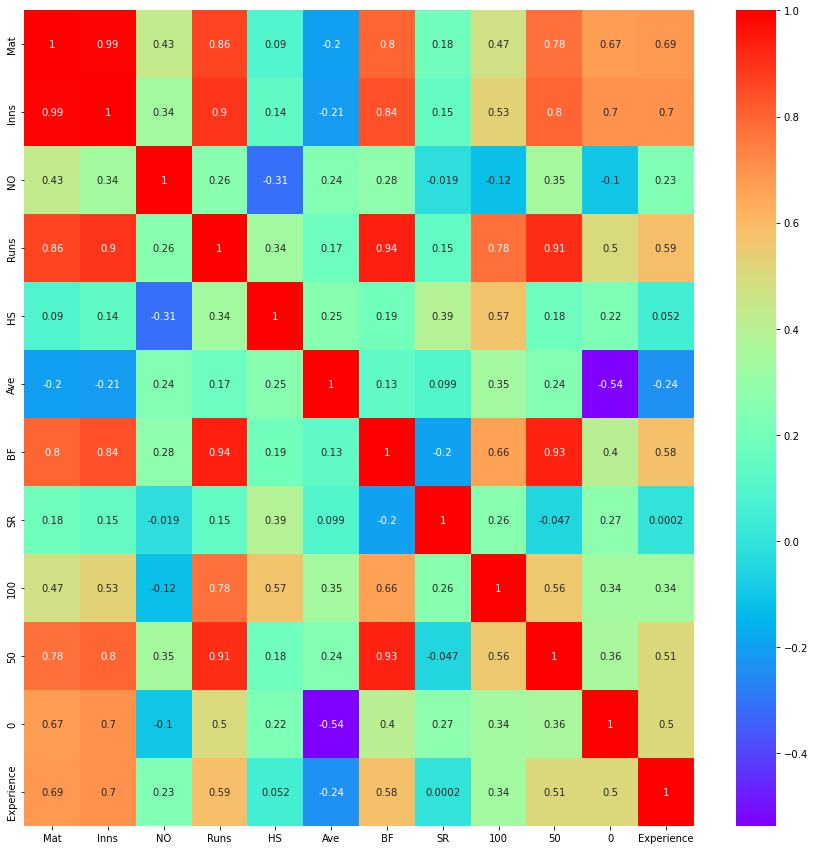

In [18]:
# HEAT MAP
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap="rainbow")
plt.show()

Text(0.5, 1.0, '0')

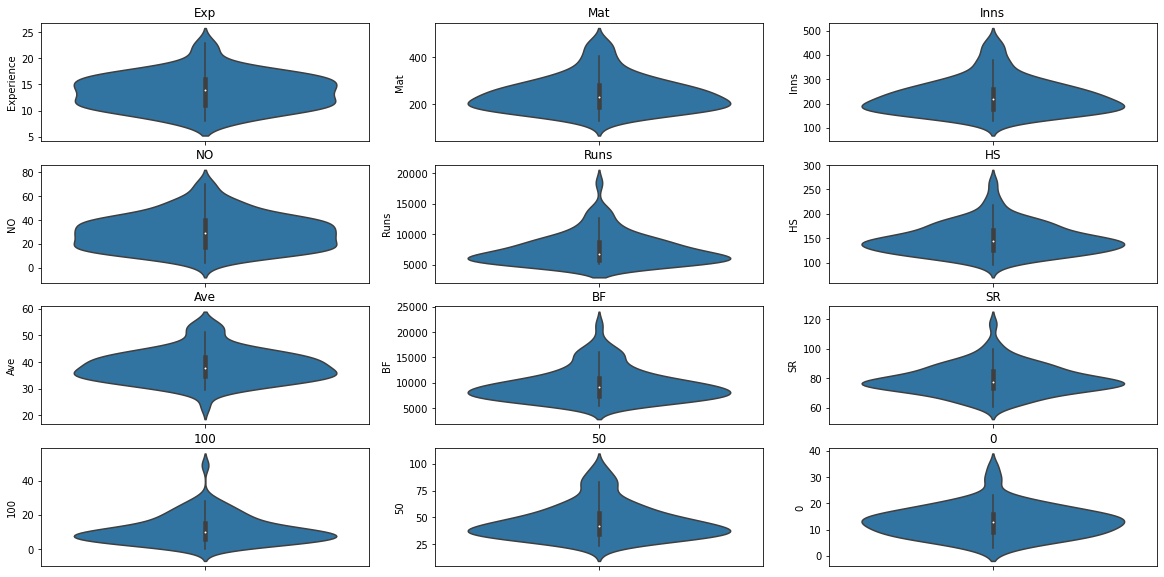

In [23]:
f,axes=plt.subplots(4,3,figsize=(20,10))
s=sns.violinplot(y=data['Experience'],ax=axes[0,0])
axes[0, 0].set_title('Exp')

s=sns.violinplot(y=data['Mat'],ax=axes[0,1])
axes[0, 1].set_title('Mat')

s=sns.violinplot(y=data['Inns'],ax=axes[0,2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=data['NO'],ax=axes[1,0])
axes[1,0].set_title('NO')

s=sns.violinplot(y=data['Runs'],ax=axes[1,1])
axes[1,1].set_title('Runs')

s=sns.violinplot(y=data['HS'],ax=axes[1,2])
axes[1,2].set_title('HS')

s=sns.violinplot(y=data['Ave'],ax=axes[2,0])
axes[2,0].set_title('Ave')

s=sns.violinplot(y=data['BF'],ax=axes[2,1])
axes[2,1].set_title('BF')

s=sns.violinplot(y=data['SR'],ax=axes[2,2])
axes[2,2].set_title('SR')

s=sns.violinplot(y=data['100'],ax=axes[3,0])
axes[3,0].set_title('100')

s=sns.violinplot(y=data['50'],ax=axes[3,1])
axes[3,1].set_title('50')

s=sns.violinplot(y=data['0'],ax=axes[3,2])
axes[3,2].set_title('0')

# It shows area and outliers in a single plot i.e. distribution and box plot

In [24]:
data

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Experience
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [25]:
# here player column seems useless . so it can be dropped for making clusters
# while making clusters similar type of data would be there
df=data.drop(columns=["Player"])

In [26]:
df

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Experience
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...
74,128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [27]:
# Model Buliding and Rescaling the data
from sklearn.preprocessing import StandardScaler
# It normalizes the data with  Mean=0 and SD=1

In [28]:
ss=StandardScaler()

In [29]:
scaled_data=ss.fit_transform(df)

In [30]:
scaled_data

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [34]:
from sklearn.cluster import KMeans

In [35]:
pd_df=pd.DataFrame(scaled_data) # scaled data can be checked in DataFrame format

In [36]:
pd_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.587674,-1.481860,-1.188961,-0.979677,-0.522838,1.106299,-0.559768,-1.457604,-0.069268,-0.950465,-1.741328,0.684919
75,-1.126598,-1.167010,0.067133,-0.984410,-1.713068,0.829159,-0.863213,-0.562275,-1.437319,-0.273453,-1.231828,-0.227024
76,-0.651961,-0.709047,0.485831,-0.996241,-0.941027,-0.537836,-0.967512,-0.234765,-0.815478,-1.258197,-1.061995,-1.138967
77,-0.638400,-0.995274,0.206699,-0.997819,0.217035,0.208570,-1.317278,1.332823,-0.691110,-1.012011,0.296671,-0.834986


In [37]:
# TO get columns Name
pd_df=pd.DataFrame(scaled_data, columns=['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])
pd_df

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.587674,-1.481860,-1.188961,-0.979677,-0.522838,1.106299,-0.559768,-1.457604,-0.069268,-0.950465,-1.741328,0.684919
75,-1.126598,-1.167010,0.067133,-0.984410,-1.713068,0.829159,-0.863213,-0.562275,-1.437319,-0.273453,-1.231828,-0.227024
76,-0.651961,-0.709047,0.485831,-0.996241,-0.941027,-0.537836,-0.967512,-0.234765,-0.815478,-1.258197,-1.061995,-1.138967
77,-0.638400,-0.995274,0.206699,-0.997819,0.217035,0.208570,-1.317278,1.332823,-0.691110,-1.012011,0.296671,-0.834986


In [38]:
# How to find optimal CLusters
# ELbow Method
# It finds the optimal number of cluters using the graph

# Second is Silhouette_score


In [40]:
clusters=[2,3,4,5,6,7]
ssd=[]
for i in clusters:
    kmc=KMeans(n_clusters=i, max_iter=150, random_state=50)
    kmc.fit(pd_df)
    ssd.append(kmc.inertia_)
ssd
# interia is variance basically, its calculated by measuring the distance between each data points
#  and its centroid , squaring this distance and summing these squares across the cluster

[644.8298268927061,
 531.568580780685,
 464.9897975808976,
 416.82577182935023,
 376.5875750089635,
 336.06957209593776]

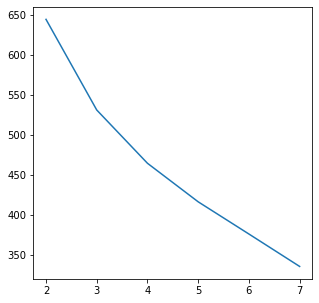

In [47]:
plt.figure(figsize=(5,5))
plt.plot(clusters,ssd)
plt.show()

In [48]:
# This Elbow Curve gives the value of "Number of CLusters= 4(approx)"


In [50]:
# Now Check Silhouette_score
from sklearn.metrics import silhouette_score
clusters=[2,3,4,5,6,7]

sil_score=[]
for i in clusters:
    kmc1=KMeans(n_clusters=i, max_iter=150, random_state=50)
    kmc1.fit(pd_df)
    cluster_labels=kmc1.labels_
    sil_score.append(silhouette_score(pd_df,cluster_labels))

sil_score

# Sihouette Score range is -1 to +1
# Its +1 best cluster
# score =0, overlapping cluster
# score =-1 worst cluster

[0.3136820966012298,
 0.2145859150936642,
 0.20533122063552012,
 0.20736135372000328,
 0.18852859678609948,
 0.1817544285967207]

In [ ]:
# Now Bulid Final Model with clusters=4

In [52]:
kmc_final=KMeans(n_clusters=4, max_iter=150, random_state=50)
kmc_final.fit(pd_df)
cluster_labels=kmc_final.labels_
score=silhouette_score(pd_df,cluster_labels)
score

0.20533122063552012

In [53]:

"""
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) 
and the mean nearest-cluster distance (b) for each sample. 
The Silhouette Coefficient for a sample is (b - a) / max(a, b). 
To clarify, b is the distance between a sample and the nearest cluster
that the sample is not a part of. Note that Silhouette Coefficient
is only defined if number of labels is 2 <= n_labels <= n_samples - 1.
"""




'\nThe Silhouette Coefficient is calculated using the mean intra-cluster distance (a) \nand the mean nearest-cluster distance (b) for each sample. \nThe Silhouette Coefficient for a sample is (b - a) / max(a, b). \nTo clarify, b is the distance between a sample and the nearest cluster\nthat the sample is not a part of. Note that Silhouette Coefficient\nis only defined if number of labels is 2 <= n_labels <= n_samples - 1.\n'

In [54]:
cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 1, 3, 1, 0, 3, 1,
       1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
data["cluster_id"]=cluster_labels

In [57]:
data

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Experience,cluster_id
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,1
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,1
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,1
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,1


In [59]:
data[data["cluster_id"]==0].sort_values(by=["NO","Ave","SR"],ascending=[True,False,False]).head(7)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Experience,cluster_id
28,SP Fleming (ICC/NZ),280,269,21,8037,134,32.40,11242,71.49,8,49,17,13,0
33,Younis Khan (PAK),265,255,23,7249,144,31.24,9628,75.29,7,48,22,15,0
27,Shahid Afridi (Asia/ICC/PAK),398,369,27,8064,124,23.57,6892,117.00,6,39,30,19,0
21,DL Haynes (WI),238,237,28,8648,152,41.37,13707,63.09,17,57,13,16,0
16,PA de Silva (SL),308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,0
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,0
22,MS Atapattu (SL),268,259,32,8529,132,37.57,12594,67.72,11,59,13,17,0


In [60]:
data[data["cluster_id"]==1].sort_values(by=["NO","Ave","SR"],ascending=[True,False,False]).head(7)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Experience,cluster_id
60,Tamim Iqbal (BDESH),173,171,4,5743,154,34.38,7333,78.31,9,38,16,10,1
37,GC Smith (Afr/SA),197,194,10,6989,141,37.98,8648,80.81,10,47,8,11,1
70,G Gambhir (INDIA),147,143,11,5238,150,39.68,6144,85.25,11,34,11,10,1
54,Mohammad Hafeez (PAK),190,190,12,5876,140,33.01,7774,75.58,11,32,16,14,1
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,1
66,IR Bell (ENG),161,157,14,5416,141,37.87,7019,77.16,4,35,6,11,1
36,NJ Astle (NZ),223,217,14,7090,145,34.92,9760,72.64,16,41,19,12,1


In [61]:
data[data["cluster_id"]==2].sort_values(by=["NO","Ave","SR"],ascending=[True,False,False]).head(7)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Experience,cluster_id
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,2
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,2
